## Построение облака слов

In [1]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
from pprint import pprint

import string
import nltk
from nltk.corpus import stopwords
import multidict as multidict

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [2]:
sentence1 = 'Всё о заявке на кредит. Как оставить заявку? Подать заявку на кредит наличными. Я сегодня подавала заявку на кредит наличными, не могу узнать результат? Оценка консультации - 2 из 5 У меня другой вопрос' 

In [3]:
sentence2 = 'Как только я заинтересовался распечаткой движения средств на счёте так и деньги появились да? Может в прокуратуру обратиться? Ага и разговаривать не хотим? Значит прокуратура. Всё тот же, сколько раз вы меня успели обмануть пока я не заметил отсутствие средств на счёте хотя по истории они уже там должны быть Оператор, Вы так и будете прыгать туда сюда? Присоеденился, отсоединился. Меня интересует почему деньги появились на счёте именно после того как я заинтересовался выпиской Будете переливать из пустого в порожнее?'

In [4]:
sentence3 = 'Здравствуйте, я произвела частичное досрочное погашение кредита, но у меня уменьшился срок кредита, а не перерасчёт процентов, как сделать чтобы был именно платёж уменьшался? Нужен специалист. Ясно, увы вы опять меня разочаровали, это последнее наше сотрудничество Оценка консультации - 1 из 5'

In [5]:
sentence4 = 'Всё о заявке на кредит. Как оставить заявку? Подать заявку на кредит наличными. Я сегодня подавала заявку на кредит наличными, не могу узнать результат? Оценка консультации - 2 из 5 У меня другой вопрос '

In [6]:
sentence5 ='Мой телефонный номер указан как контактный номер другого лица являющегося клиентом банка, мне приходят сообщения на имя другого лица. По телефону горячей линии исключить мой номер отказались, требуют обратиться в банк с договором связи, который заключен лет 15 назад. После требования удалить мой номер при разговоре с оператором, оператор сделал вид что меня не слышит.'

In [7]:
sentence6 = "Потребительский кредит (рассрочка) на год, что может быть элементарнее, но здесь не все так просто.Несколько раз делал замечание за манеру общения в телефонном разговоре сотрудникам этого «банка». Видимо набирают туда совсем кого попало и этике общения не учат. Ко всему прочему, к минусам, пожалуй, добавлю долгое зачисление средств на счет с карты другого банка (тинькофф). То есть, если на потребительский кредит в отп банке деньги зачислялись в течение одного дня, то здесь банк не видел деньги спустя 2-3 дня после оплаты, соответственно начинались прозвоны раз в час от разных сотрудников банка мне и контактным номерам, хотя отвечал я всегда с первого раза и описывал ситуацию, видимо информацию фиксировать в почтабанке не принято и аналогичный звонок раздавался спустя час и все по новой. Ну к этому мы привыкли. А вот, что разочаровало больше всего, так это несоответствие платежей графику прописанному в договоре(в магазине при оформлении рассрочки), в принципе не критично с точки зрения финансов, т.к суммы небольшие, но о работе организации говорит. Однозначно не обращусь больше, тк выплачивал несколько потребительских примерно в одно время и есть с чем сравнить. Тут худшее обслуживание P.S и еще одно замечание, скорее даже нюанс этого банка. Если вам поступает взыскание от органов власти(штрафы в частности), то арест распространяется и на счет для платежей по кредиту. В отп, тинькофф и альфа не сталкивались с таким (там только на карты и вклады накладывается)"

In [8]:
sentence7 = 'Мой телефонный номер указан как контактный номер другого\
лица являющегося клиентом банка, мне приходят сообщения на имя другого лица. По телефону горячей линии исключить мой номер отказались, требуют обратиться в банк с договором связи, который заключен лет 15 назад. После требования удалить мой номер при разговоре с оператором, оператор сделал вид что меня не слышит. Проблема с телефонным номером до сих пор не решена, номер не тот, ообщения на имя другого лица, номер другого человека, чужой номер, неправильный номер, неправильный номер'

In [9]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    for text in sentence.split(" "):
        if re.match("«|»|”|“|1|2|3|4|5|лицо|имя|ведь|это|поэтому|свой|которые|кто-то|всё|который|сам|мочь", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [10]:
word_list = [morph.parse(f'{i.lower()}')[0].normal_form for i in nltk.word_tokenize(sentence7) if i.lower() not in string.punctuation 
             and i.lower() not in stopwords.words('russian')]
text = ' '.join(word_list)

In [11]:
freq_dict = getFrequencyDictForText(text)

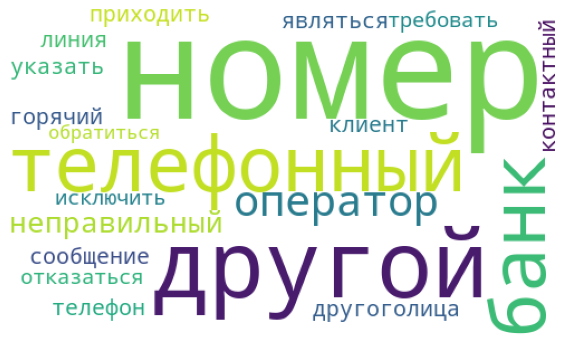

In [16]:
# построение облака слов

wc = WordCloud(width=500, height=300, background_color="white", max_words=20)
wc.generate_from_frequencies(freq_dict)

plt.imshow(wc)
plt.axis("off")
plt.show()